In [1]:
import pandas as pd
import numpy as np
import glob, pathlib
import matplotlib.pyplot as plt 

In [65]:
V, HILO, GAIN, signal = [], [], [], []
sThirdLow = []
sSecondLow = []
for k in range(11):
    npz = "data/6_x_0_"+str(k*100)+"_.npz"
    npzfile = np.load(npz)
    V.append(str(npzfile["V"]))
    HILO.append(str(npzfile["V"]))
    GAIN.append(str(npzfile["GAIN"]))
    X = np.array(npzfile["signal"])
    Xm = X[-4000:].mean()
    s = [(x-Xm)/512 for x in X ]
    signal.append( s )
    sThirdLow.append( np.max(np.abs(s)[7000:]) )
    sSecondLow.append( np.max(np.abs(s)[5000:7000]) )
    print(sThirdLow[-1])

0.0015927734375000835
0.0017392578124999503
0.00148193359375004
0.0011518554687499627
0.0010024414062500542
0.001408203125000007
0.0020781249999999307
0.00833154296875005
0.020011230468749974
0.07563281249999998
0.19403857421875004


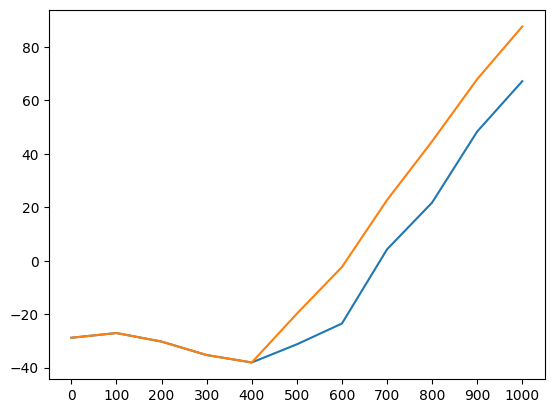

In [18]:
plt.plot(GAIN,100+20.0*np.log(sThirdLow))
plt.plot(GAIN,100+20.0*np.log(sSecondLow))

In [69]:
V, HILO, GAIN, signal = [], [], [], []
sThird = []
sSecond = []
for k in range(11):
    npz = "data/6_x_1_"+str(k*100)+"_.npz"
    npzfile = np.load(npz)
    V.append(str(npzfile["V"]))
    HILO.append(str(npzfile["V"]))
    GAIN.append(str(npzfile["GAIN"]))
    X = np.array(npzfile["signal"])
    Xm = X[-4000:].mean()
    s = [(x-Xm)/512 for x in X ]
    signal.append( s )
    sThird.append( np.max(np.abs(s)[7000:]) )
    sSecond.append( np.max(np.abs(s)[5000:7000]) )
    print(sThird[-1])

0.0030107421874999707
0.002285156250000031
0.00254638671874996
0.004324218749999997
0.0059208984375000995
0.014093750000000016
0.03427099609374995
0.11570068359374996
0.3382998046875
0.90643603515625
1.16106787109375


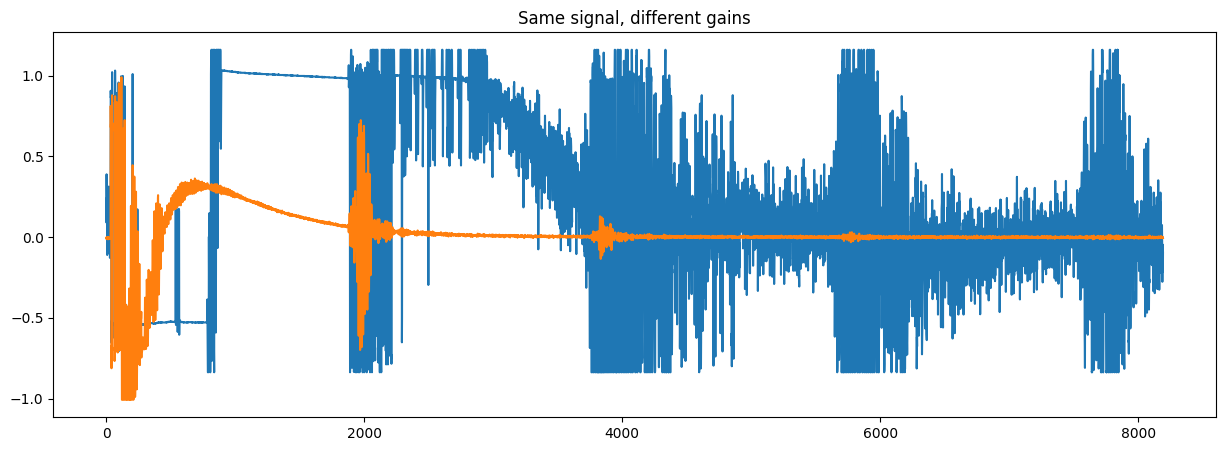

In [74]:
fig = plt.figure(figsize=(15,5))
plt.plot(signal[-1])
plt.plot(signal[5])
plt.title("Same signal, different gains")
plt.savefig("signals.jpg")

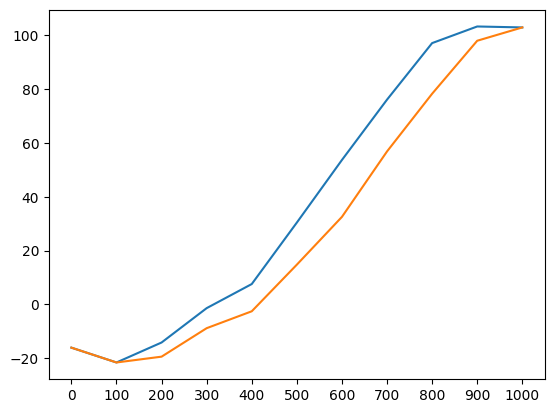

In [22]:
plt.plot(GAIN,100+20.0*np.log(sSecond),label="Second peak")
plt.plot(GAIN,100+20.0*np.log(sThird),label="Third peak")

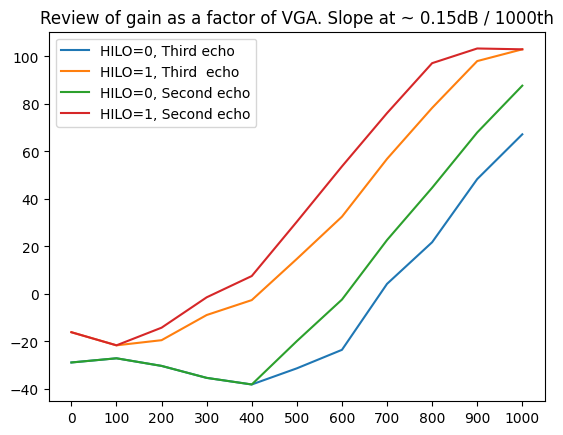

In [33]:
plt.plot(GAIN,100+20.0*np.log(sThirdLow),label="HILO=0, Third echo")
plt.plot(GAIN,100+20.0*np.log(sThird),label="HILO=1, Third  echo")
plt.plot(GAIN,100+20.0*np.log(sSecondLow),label="HILO=0, Second echo")
plt.plot(GAIN,100+20.0*np.log(sSecond),label="HILO=1, Second echo")
plt.legend()
plt.title("Review of gain as a factor of VGA. Slope at ~ 0.15dB / 1000th")
plt.savefig("gains.jpg")


Text(0.5, 1.0, 'Diff with HILO: 52.8dB.')

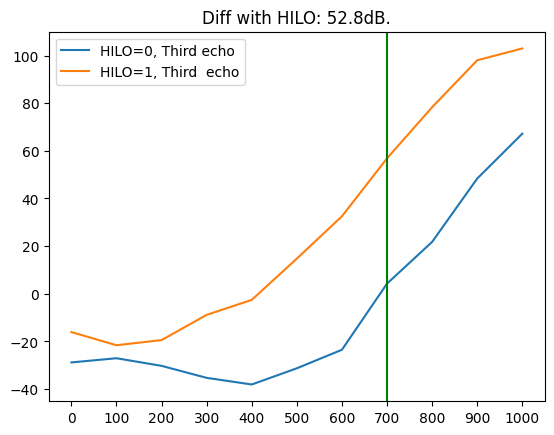

In [51]:
plt.plot(GAIN,100+20.0*np.log(sThirdLow),label="HILO=0, Third echo")
plt.plot(GAIN,100+20.0*np.log(sThird),label="HILO=1, Third  echo")
plt.axvline(x=7,color="green")
plt.legend()
HI = np.average(100+20.0*np.log(sThird[5:9]))
LO = np.average(100+20.0*np.log(sThirdLow[5:9]))
plt.title("Diff with HILO: "+str(int((HI-LO)*10)/10)+"dB.")


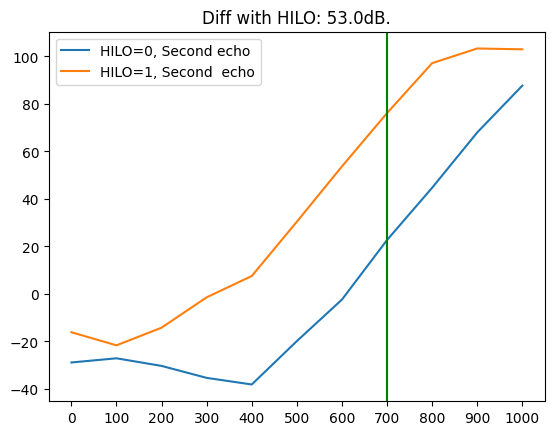

In [75]:
plt.plot(GAIN,100+20.0*np.log(sSecondLow),label="HILO=0, Second echo")
plt.plot(GAIN,100+20.0*np.log(sSecond),label="HILO=1, Second  echo")
plt.axvline(x=7,color="green")
plt.legend()
HI = np.average(100+20.0*np.log(sSecond[5:9]))
LO = np.average(100+20.0*np.log(sSecondLow[5:9]))
plt.title("Diff with HILO: "+str(int((HI-LO)*10)/10)+"dB.")
plt.savefig("hilo.jpg")

In [76]:
20*np.log(1024)

138.62943611198907